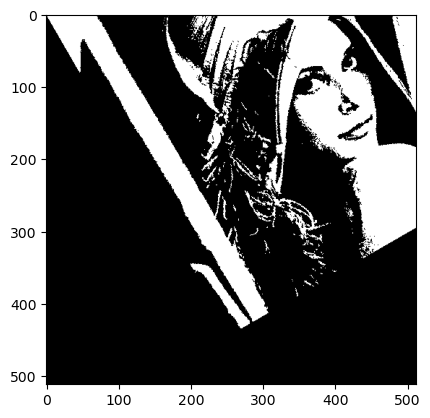

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_transformation(f_source, H):
    M, N = f_source.shape
    f_target = np.zeros((M, N), dtype=f_source.dtype)
    
    for i_prime in range(M):
        for j_prime in range(N):
            # (i, j) is obtained by applying the inverse of the transformation matrix H
            original_coords = np.dot(np.linalg.inv(H), np.array([i_prime, j_prime, 1]))
            i, j = int(round(original_coords[0])), int(round(original_coords[1]))
            
            # Verify that the coordinates in the source image are valid
            if 0 <= i < M and 0 <= j < N:
                f_target[i_prime, j_prime] = f_source[i, j]
    return f_target

image_path = './image/lena.bmp'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Move (3,2) and rotate 30degree
H = np.array([
    [0.866, -0.5, 0]
    ,[0.5, 0.866, 0]
    ,[3.5981, 0.2321, 1]
])

transformed_image = apply_transformation(binary_image, H)
plt.imshow(transformed_image, cmap='gray')